Import KDE estimator and integrator from Scipy

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.stats

Plot random samples from a $\mathcal{N}(0, 1)$ distribution.

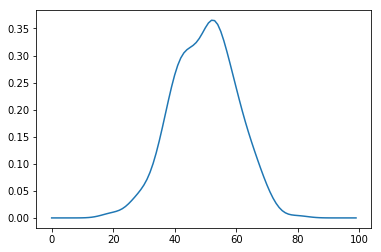

In [2]:
nobs = 300
dens = sm.nonparametric.KDEUnivariate(np.random.normal(size=nobs))
dens.fit(cut=100)
x = np.linspace(-5, 5, 100)
plt.plot(dens.evaluate(x))
plt.show()

Calculate KL divergence by numerical integration (eqn. 2 in blue box from here: https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)

In [3]:
limit = 10
kl = integrate.quad(lambda x: -scipy.stats.norm.pdf(x, 0, 1) * (np.log(dens.evaluate(x))  - scipy.stats.norm.logpdf(x, 0, 1)),
               -limit, limit)[0]
print('KL divergence = ' + str(kl))

KL divergence = 0.00814314808062


Testing KL divergence calculation for different sample sizes.

In [4]:
def test_kl(nobs):
    dens = sm.nonparametric.KDEUnivariate(np.random.normal(size=nobs))
    dens.fit(cut=100)
    limit = 10
    kl = integrate.quad(lambda x: -scipy.stats.norm.pdf(x, 0, 1) * (np.log(dens.evaluate(x))  - scipy.stats.norm.logpdf(x, 0, 1)),
               -limit, limit)[0]
    return kl

In [5]:
sample_sizes = np.linspace(5, 1000, dtype=int)
kl = np.zeros(len(sample_sizes))
for i in range(len(sample_sizes)):
    kl[i] = test_kl(sample_sizes[i])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


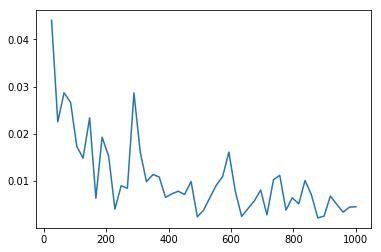

In [6]:
plt.plot(sample_sizes, kl)
plt.show()

Looks ok!